In [1]:
import pandas as pd
import matplotlib as plt
from matplotlib import pyplot as plt
from scipy.stats import linregress
import numpy as np
import requests
import gmaps

from config import api_key
# Census & gmaps API Keys
from config1 import (api_key, gkey)


# Configure gmaps
gmaps.configure(api_key=gkey)

In [2]:
happiness_data2015=pd.read_csv("Resources/happiness/2015.csv")
happiness_data2015.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')

In [3]:
happiness_data2015_df = happiness_data2015[["Country","Happiness Score","Happiness Rank","Health (Life Expectancy)"]]

In [4]:
# put country name in a list
countries=happiness_data2015_df["Country"].tolist()

lat=[]
lng=[]
shortname=[]
i=1
for country in countries:
        target_url = ('https://maps.googleapis.com/maps/api/geocode/json?''address={0}&key={1}').format(country, gkey)
        response = requests.get(target_url).json()
        print("Processing Record " + str(i) + " of Set 1 | " + country)
        shortname.append(response['results'][0]['address_components'][0]['short_name'])
        lat.append(response['results'][0]['geometry']['location']["lat"])
        lng.append(response['results'][0]['geometry']['location']["lng"])
        i=i+1

Processing Record 1 of Set 1 | Switzerland
Processing Record 2 of Set 1 | Iceland
Processing Record 3 of Set 1 | Denmark
Processing Record 4 of Set 1 | Norway
Processing Record 5 of Set 1 | Canada
Processing Record 6 of Set 1 | Finland
Processing Record 7 of Set 1 | Netherlands
Processing Record 8 of Set 1 | Sweden
Processing Record 9 of Set 1 | New Zealand
Processing Record 10 of Set 1 | Australia
Processing Record 11 of Set 1 | Israel
Processing Record 12 of Set 1 | Costa Rica
Processing Record 13 of Set 1 | Austria
Processing Record 14 of Set 1 | Mexico
Processing Record 15 of Set 1 | United States
Processing Record 16 of Set 1 | Brazil
Processing Record 17 of Set 1 | Luxembourg
Processing Record 18 of Set 1 | Ireland
Processing Record 19 of Set 1 | Belgium
Processing Record 20 of Set 1 | United Arab Emirates
Processing Record 21 of Set 1 | United Kingdom
Processing Record 22 of Set 1 | Oman
Processing Record 23 of Set 1 | Venezuela
Processing Record 24 of Set 1 | Singapore
Processi

In [5]:
print(response)

{'results': [{'address_components': [{'long_name': 'Togo', 'short_name': 'TG', 'types': ['country', 'political']}], 'formatted_address': 'Togo', 'geometry': {'bounds': {'northeast': {'lat': 11.139617, 'lng': 1.8089071}, 'southwest': {'lat': 6.0812, 'lng': -0.1440418}}, 'location': {'lat': 8.619543, 'lng': 0.824782}, 'location_type': 'APPROXIMATE', 'viewport': {'northeast': {'lat': 11.139617, 'lng': 1.8089071}, 'southwest': {'lat': 6.0812, 'lng': -0.1440418}}}, 'place_id': 'ChIJGVQYE8HhIxARYJPRGjBbrvo', 'types': ['country', 'political']}], 'status': 'OK'}


In [7]:
#add lat and lng to the happyness dataframe
happiness_data2015_df["Lat"]=lat
happiness_data2015_df["Lng"]=lng

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [8]:
# select top 20 happiness country and store top20 maker location for lat, lng
top20=happiness_data2015_df.loc[happiness_data2015_df["Happiness Rank"]<21]
top20_marker_locations =top20[["Lat","Lng"]]
top20_countries=top20["Country"]
top20

,Country,Happiness Score,Happiness Rank,Health (Life Expectancy),Lat,Lng
0,Switzerland,7.587,1,0.94143,46.818188,8.227512
1,Iceland,7.561,2,0.94784,64.963051,-19.020835
2,Denmark,7.527,3,0.87464,56.263920,9.501785
3,Norway,7.522,4,0.88521,60.472024,8.468946
4,Canada,7.427,5,0.90563,56.130366,-106.346771
5,Finland,7.406,6,0.88911,61.924110,25.748151
6,Netherlands,7.378,7,0.89284,52.132633,5.291266
7,Sweden,7.364,8,0.91087,60.128161,18.643501
8,New Zealand,7.286,9,0.90837,-40.900557,174.885971
9,Australia,7.284,10,0.93156,-25.274398,133.775136


In [9]:
#import world out of pocket expediture to check country shortname
import json
alldata = requests.get("https://restcountries.eu/rest/v2/all").json()
country_name=[]
country_code=[]
shortcode3digit=[]
##################
# create a lookup dictionary for country symbol
##################
for countrydic in alldata:
    country_name.append(countrydic['name'])
    country_code.append(countrydic['alpha3Code'])

countrylookupdic = {}
for i in range(len(country_name)):
    countrylookupdic[country_name[i]] = country_code[i]
    
# manually add missing country names
countrylookupdic['United States'] = 'USA'
countrylookupdic['United Kingdom'] = 'GBR'
countrylookupdic['Venezuela']='VEN'
countrylookupdic['South Korea']='KOR'
countrylookupdic['Bolivia']='BOL'
countrylookupdic['Moldova']='MDA'
countrylookupdic['Russia']='RUS'
countrylookupdic['North Cyprus']='CYP'
countrylookupdic['Kosovo']='SCG'
countrylookupdic['Vietnam']='VNM'
countrylookupdic['Somaliland region']='SOM'
countrylookupdic['Macedonia']='MKD'
countrylookupdic['Laos']='LAO'
countrylookupdic['Palestinian Territories']='PSE'
countrylookupdic['Iran']='IRN'
countrylookupdic['Iran']='IRN'
countrylookupdic['Congo (Kinshasa)']='NONE'
countrylookupdic['Congo (Brazzaville)']='CON'
countrylookupdic['Tanzania']='TZA'
countrylookupdic['Ivory Coast']='CIV'
countrylookupdic['Syria']='SYR'
#print(countrylookupdic)
#print(countrylookupdic['Cabo Verde'])

##################
# check missing country names
##################
for country in countries:
    shortname = countrylookupdic.get(country)
    shortcode3digit.append(shortname)
    if shortname == None:
        print(shortname)

In [10]:
happiness_data2015_df["Country Code"]=shortcode3digit
happiness_data2015_df.to_csv("Resources/happiness/happiness_ranking2015")

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [11]:
# Create a map using top20 Happiness country coordinates to set markers
# Create a marker_layer using the top20 country name list to fill the info box
fig1 = gmaps.figure()
markers1 = gmaps.marker_layer(top20_marker_locations,info_box_content=[f"Country: {country}" for country in top20_countries])
fig1.add_layer(markers1)

fig1

Figure(layout=FigureLayout(height='420px'))

In [12]:
# select low 20 happiness country and store low 20 maker location for lat, lng
low20=happiness_data2015_df.loc[happiness_data2015_df["Happiness Rank"]>137]
low20_marker_locations =low20[["Lat","Lng"]]
low20_countries=low20["Country"]


In [13]:
# Create a map using low20 Happiness country coordinates to set markers
# Create a marker_layer using the low20 country name list to fill the info box
fig2 = gmaps.figure()
markers2 = gmaps.marker_layer(low20_marker_locations,info_box_content=[f"Country: {country}" for country in low20_countries])
fig2.add_layer(markers2)
fig2

Figure(layout=FigureLayout(height='420px'))

In [14]:
#import world current health expenditure data set from csv file and organized the data for analysis
health_current_expenditure = pd.read_csv("Resources/happiness/current_expenditure_Data.csv")
health_current_expenditure_2015=health_current_expenditure[["Country Name","2015 [YR2015]","Country Code"]]
health_current_expenditure_2015=health_current_expenditure_2015.rename(columns={"2015 [YR2015]":"2015 CHE (%GDP)",
                                                                       "Country Name":"Country"})
#import world domestic govement health expenditure data set from csv file and organized the data for analysis
health_gov_expenditure=pd.read_csv("Resources/happiness/Domestic_Govement_Health_Expenditure Data.csv")
health_gov_expenditure_2015=health_gov_expenditure.loc[:,["Country Name","2015 [YR2015]","Country Code"]]
health_gov_expenditure_2015=health_gov_expenditure_2015.rename(columns={"2015 [YR2015]":"2015 GHE (%GDP)",
                                                                         "Country Name":"Country"})


In [15]:
# Merge CHE and DGHE date to Happiness Ranking data and check for nandata
merge1=happiness_data2015_df.merge(health_current_expenditure_2015,on='Country Code',how="left")
merge2=merge1.merge(health_gov_expenditure_2015,on='Country Code',how="left")

nandata1 = merge2.isnull().sum()
nandata1

Country_x                   0
Happiness Score             0
Happiness Rank              0
Health (Life Expectancy)    0
Lat                         0
Lng                         0
Country Code                0
Country_y                   4
2015 CHE (%GDP)             4
Country                     4
2015 GHE (%GDP)             4
dtype: int64

In [18]:
merge2.head()

,Country_x,Happiness Score,Happiness Rank,Health (Life Expectancy),Lat,Lng,Country Code,Country_y,2015 CHE (%GDP),Country,2015 GHE (%GDP)
0,Switzerland,7.587,1,0.94143,46.818188,8.227512,CHE,Switzerland,12.05701692,Switzerland,70.72655713
1,Iceland,7.561,2,0.94784,64.963051,-19.020835,ISL,Iceland,8.6091496,Iceland,81.47514535
2,Denmark,7.527,3,0.87464,56.263920,9.501785,DNK,Denmark,10.32620701,Denmark,84.14279942
3,Norway,7.522,4,0.88521,60.472024,8.468946,NOR,Norway,9.97554719,Norway,85.39754712
4,Canada,7.427,5,0.90563,56.130366,-106.346771,CAN,Canada,10.43562237,Canada,73.54982557


In [19]:
# Data Clearup and print head
happinese_ranking_data=merge2[["Country","Country Code","Happiness Score","Happiness Rank","Health (Life Expectancy)",
                               "2015 CHE (%GDP)","2015 GHE (%GDP)"]]

len(shortcode3digit)

158

In [40]:
# Get Out of Pocket over Govement Health Expendirure(%) through APIs
oop_url="http://apps.who.int/gho/athena/data/GHO/GHED_OOPSCHE_SHA2011.json?profile=simple&filter=COUNTRY:"
year=";YEAR:2015"

oop_value=[]
oop_country=[]

i=1
for code in shortcode3digit:
    try:
        response_OOP = requests.get(oop_url+code+year).json()
        if response_OOP.get('fact'):
            oop_country.append(response_OOP['fact'][0]['dim']["COUNTRY"])
            oop_value.append(response_OOP['fact'][0]['Value'])
            print("Processing----------"+str(i)+code)
        else:
            oop_country.append("NaN")
            oop_value.append("NaN")
            print("----------------------No DATA")
    except:
        print("---------------------------error")
        oop_country.append("NaN")
        oop_value.append("NaN")
    i=i+1

Processing----------1CHE
Processing----------2ISL
Processing----------3DNK
Processing----------4NOR
Processing----------5CAN
Processing----------6FIN
Processing----------7NLD
Processing----------8SWE
Processing----------9NZL
Processing----------10AUS
Processing----------11ISR
Processing----------12CRI
Processing----------13AUT
Processing----------14MEX
Processing----------15USA
Processing----------16BRA
Processing----------17LUX
Processing----------18IRL
Processing----------19BEL
Processing----------20ARE
Processing----------21GBR
Processing----------22OMN
Processing----------23VEN
Processing----------24SGP
Processing----------25PAN
Processing----------26DEU
Processing----------27CHL
Processing----------28QAT
Processing----------29FRA
Processing----------30ARG
Processing----------31CZE
Processing----------32URY
Processing----------33COL
Processing----------34THA
Processing----------35SAU
Processing----------36ESP
Processing----------37MLT
---------------------------error
Processing----

In [ ]:
#Merge oop_data to final dataframe
happinese_ranking_data["OOP/CHE(%)"]=oop_value

happinese_ranking_data.head()

#oop_data=pd.DataFrame({"Country":oop_country,"OOP/CHE(%)":oop_value}) #,"2015 Suicide rate/10k ppl":suicide_value})
#final_health_data=merge2.merge(oop_suicide_data,on='Country',how="left")
#nandata = final_health_data.loc[final_health_data["OOP/CHE(%)"].isnull()]
#print(nandata)

In [62]:
suicide_value=[]
suicide_rate_url="http://apps.who.int/gho/athena/data/GHO/MH_12.json?profile=simple&filter=COUNTRY:"
suicide_year=";YEAR:2015"


suicide_value=[]
suicide_country=[]
oop_countrycode=[]

i=1
for code in shortcode3digit:
    try:
        response_suicide = requests.get(suicide_rate_url+code+suicide_year).json()
        if response_suicide.get('fact'):
            suicide_value.append(response_suicide['fact'][1]['Value'])
            print("Processing----------"+str(i)+code)
        else:
            suicide_value.append("NaN")
            print("----------------------No DATA")
    except:
        print("---------------------------error")
        suicide_value.append("NaN")
    i=i+1

Processing----------1CHE
Processing----------2ISL
Processing----------3DNK
Processing----------4NOR
Processing----------5CAN
Processing----------6FIN
Processing----------7NLD
Processing----------8SWE
Processing----------9NZL
Processing----------10AUS
Processing----------11ISR
Processing----------12CRI
Processing----------13AUT
Processing----------14MEX
Processing----------15USA
Processing----------16BRA
Processing----------17LUX
Processing----------18IRL
Processing----------19BEL
Processing----------20ARE
Processing----------21GBR
Processing----------22OMN
Processing----------23VEN
Processing----------24SGP
Processing----------25PAN
Processing----------26DEU
Processing----------27CHL
Processing----------28QAT
Processing----------29FRA
Processing----------30ARG
Processing----------31CZE
Processing----------32URY
Processing----------33COL
Processing----------34THA
Processing----------35SAU
Processing----------36ESP
Processing----------37MLT
---------------------------error
Processing----

In [158]:
happinese_ranking_data.head()

,Country,Country Code,Happiness Score,Happiness Rank,Health (Life Expectancy),2015 CHE (%GDP),2015 GHE (%GDP),OOP/CHE(%),Suicide Rate(Both Sex)
0,Switzerland,CHE,7.587,1,0.94143,12.057017,70.726557,28.3,11.4
1,Iceland,ISL,7.561,2,0.94784,8.609150,81.475145,17.0,12.9
2,Denmark,DNK,7.527,3,0.87464,10.326207,84.142799,13.7,8.6
3,Norway,NOR,7.522,4,0.88521,9.975547,85.397547,14.3,10.2
4,Canada,CAN,7.427,5,0.90563,10.435622,73.549826,14.6,10.5


In [95]:
#happinese_ranking_data["Suicide Rate(Both Sex)"]=suicide_value
#happinese_ranking_data.replace("NAN", np.nan)
#happinese_ranking_data.replace("No data", np.nan)
#happinese_ranking_data.replace("..", np.nan)
#happinese_ranking_data=happinese_ranking_data.dropna(axis=0,how="any")
#print(happinese_ranking_data)
#print(happinese_ranking_data["2015 GHE (%GDP)"][8])

happinese_ranking_data=happinese_ranking_data[happinese_ranking_data["2015 GHE (%GDP)"]!= ".."]
happinese_ranking_data=happinese_ranking_data[happinese_ranking_data["OOP/CHE(%)"]!= "No data"]
happinese_ranking_data=happinese_ranking_data.convert_objects(convert_numeric=True)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use DataFrame.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  # This is added back by InteractiveShellApp.init_path()


In [96]:
#import sys
#np.set_printoptions(threshold=sys.maxsize)
#print(happinese_ranking_data["2015 CHE (%GDP)"][69:105])

In [97]:
#string_che=happinese_ranking_data[type(happinese_ranking_data["2015 CHE (%GDP)"]) is str]
#len(string_che)

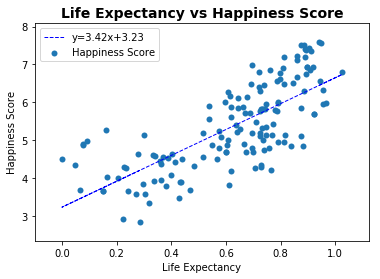

In [165]:
from matplotlib import pyplot as plt
from scipy.stats import linregress


hle=happinese_ranking_data["Health (Life Expectancy)"]
x_axis_hle=hle
# Set line
(slope_hle, intercept_hle, r_hle , p_hle, se_hle) = linregress(x_axis_hle,happinese_ranking_data["Happiness Score"] )
fit_hle= slope_hle * x_axis_hle + intercept_hle

#fig, (ax1, ax2) = plt.subplots(2, sharex= False)
plt.title("Life Expectancy vs Happiness Score", fontsize=14, fontweight="bold")

plt.xlim(min(x_axis_hle-0.1), max(x_axis_hle)+0.1,)
plt.ylim(min(happinese_ranking_data["Happiness Score"]-0.5),max(happinese_ranking_data["Happiness Score"])+0.5)
plt.scatter(x_axis_hle,happinese_ranking_data["Happiness Score"] ,linewidth=0, marker="o")
plt.plot(x_axis_hle, fit_hle,'b--',linewidth=1,label='y={:.2f}x+{:.2f}'.format(slope_hle,intercept_hle))
plt.ylabel("Happiness Score")
plt.xlabel("Life Expectancy")
plt.legend()

plt.show()

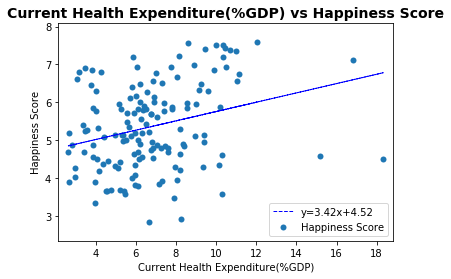

In [150]:
che=happinese_ranking_data["2015 CHE (%GDP)"]
x_axis_che=che
(slope_che, intercept_che, r_che , p_che, se_che) = linregress(x_axis_che,happinese_ranking_data["Happiness Score"] )
fit_che= slope_che * x_axis_che+ intercept_che

plt.title("Current Health Expenditure(%GDP) vs Happiness Score", fontsize=14, fontweight="bold")

plt.xlim(min(x_axis_che-0.5), max(x_axis_che)+0.5,)
plt.ylim(min(happinese_ranking_data["Happiness Score"]-0.5),max(happinese_ranking_data["Happiness Score"])+0.5)
plt.scatter(x_axis_che,happinese_ranking_data["Happiness Score"] ,linewidth=0, marker="o")
plt.plot(x_axis_che, fit_che,'b--',linewidth=1,label='y={:.2f}x+{:.2f}'.format(slope_hle,intercept_che))
plt.ylabel("Happiness Score")
plt.xlabel("Current Health Expenditure(%GDP)")
plt.legend()

plt.show()

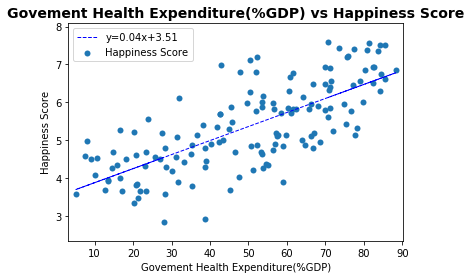

In [167]:
ghe=happinese_ranking_data["2015 GHE (%GDP)"]
x_axis_ghe=ghe
(slope_ghe, intercept_ghe, r_ghe , p_ghe, se_ghe) = linregress(x_axis_ghe,happinese_ranking_data["Happiness Score"] )
fit_ghe= slope_ghe * x_axis_ghe+ intercept_ghe

plt.title("Govement Health Expenditure(%GDP) vs Happiness Score", fontsize=14, fontweight="bold")

plt.xlim(min(x_axis_ghe-2), max(x_axis_ghe)+2,)
plt.ylim(min(happinese_ranking_data["Happiness Score"]-0.5),max(happinese_ranking_data["Happiness Score"])+0.5)
plt.scatter(x_axis_ghe,happinese_ranking_data["Happiness Score"] ,linewidth=0, marker="o")
plt.plot(x_axis_ghe, fit_ghe,'b--',linewidth=1,label='y={:.2f}x+{:.2f}'.format(slope_ghe,intercept_ghe))
plt.ylabel("Happiness Score")
plt.xlabel("Govement Health Expenditure(%GDP)")
plt.legend()

plt.show()

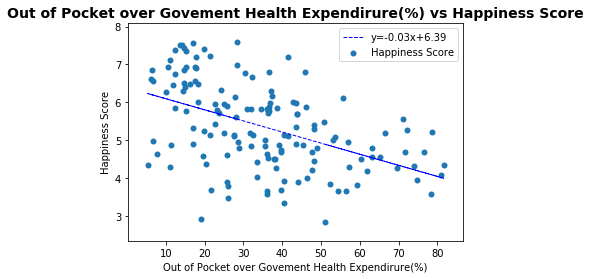

In [159]:
oop=happinese_ranking_data["OOP/CHE(%)"]
x_axis_oop=oop
(slope_oop, intercept_oop, r_oop , p_oop, se_oop) = linregress(x_axis_oop,happinese_ranking_data["Happiness Score"] )
fit_oop= slope_oop * x_axis_oop + intercept_oop

plt.title("Out of Pocket over Govement Health Expendirure(%) vs Happiness Score", fontsize=14, fontweight="bold")

plt.xlim(min(x_axis_oop)-5, max(x_axis_oop)+5,)
plt.ylim(min(happinese_ranking_data["Happiness Score"]-0.5),max(happinese_ranking_data["Happiness Score"])+0.5)
plt.scatter(x_axis_oop,happinese_ranking_data["Happiness Score"] ,linewidth=0, marker="o")
plt.plot(x_axis_oop, fit_oop,'b--',linewidth=1,label='y={:.2f}x+{:.2f}'.format(slope_oop,intercept_oop))
plt.ylabel("Happiness Score")
plt.xlabel("Out of Pocket over Govement Health Expendirure(%)")
plt.legend()

plt.show()

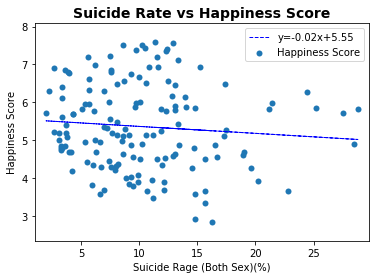

In [164]:
sr=happinese_ranking_data["Suicide Rate(Both Sex)"]
x_axis_sr=sr
(slope_sr, intercept_sr, r_sr , p_sr, se_sr) = linregress(x_axis_sr,happinese_ranking_data["Happiness Score"] )
fit_sr= slope_sr * x_axis_sr + intercept_sr

plt.title("Suicide Rate vs Happiness Score", fontsize=14, fontweight="bold")

plt.xlim(min(x_axis_sr)-1, max(x_axis_sr)+1,)
plt.ylim(min(happinese_ranking_data["Happiness Score"]-0.5),max(happinese_ranking_data["Happiness Score"])+0.5)
plt.scatter(x_axis_sr,happinese_ranking_data["Happiness Score"] ,linewidth=0, marker="o")
plt.plot(x_axis_sr, fit_sr,'b--',linewidth=1,label='y={:.2f}x+{:.2f}'.format(slope_sr,intercept_sr))
plt.ylabel("Happiness Score")
plt.xlabel("Suicide Rage (Both Sex)(%)")
plt.legend()

plt.show()

In [185]:
stats_df=pd.DataFrame({"Factors":['Health (Life Expectancy)','Current Health Expenditure(%GDP)', 'Govement Health Expenditure(%GDP)',
                                 'Out of pocket/Govement Expenditure','Suicide Rate'],
                      "R Value":[r_hle,r_che,r_ghe,r_oop,r_sr],
                      "P Value":[p_hle,p_che,p_ghe,p_oop,p_sr],
                      "Standard Error":[se_hle,se_che,se_ghe,se_oop,se_sr]})
stats_df

,Factors,R Value,P Value,Standard Error
0,Health (Life Expectancy),0.736374,4.887253e-26,0.262852
1,Current Health Expenditure(%GDP),0.283969,5.374099e-04,0.034795
2,Govement Health Expenditure(%GDP),0.729708,2.232907e-25,0.002906
3,Out of pocket/Govement Expenditure,-0.483928,6.986104e-10,0.004438
4,Suicide Rate,-0.089894,2.822494e-01,0.017030


In [45]:
happinese_ranking_data.corr()

,Happiness Score,Happiness Rank,Health (Life Expectancy)
Happiness Score,1.000000,-0.992105,0.724200
Happiness Rank,-0.992105,1.000000,-0.735613
Health (Life Expectancy),0.724200,-0.735613,1.000000
